In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('virat_kohli_odi.csv') 

# Batting Performance Analysis
# Batting Average
# Convert 'Runs' and 'Inns' columns to numeric type
data['Runs'] = pd.to_numeric(data['Runs'], errors='coerce')  # 'coerce' will convert invalid parsing to NaN
data['Inns'] = pd.to_numeric(data['Inns'], errors='coerce')

# Remove rows with NaN values (if any)
data = data.dropna(subset=['Runs', 'Inns'])

# Calculate batting average

batting_avg = data['Runs'].sum() / data['Inns'].sum()
print("Batting Average:", batting_avg)





Batting Average: 28.38888888888889


In [13]:
# Strike Rate
# Convert 'Runs' and 'BF' columns to numeric type
data['Runs'] = pd.to_numeric(data['Runs'], errors='coerce')
data['BF'] = pd.to_numeric(data['BF'], errors='coerce')

# Remove rows with NaN values (if any)
data = data.dropna(subset=['Runs', 'BF'])

# Calculate Strike Rate
# Ensure 'BF' column is not zero to avoid division by zero error
bf_sum = data['BF'].sum()
if bf_sum != 0:
    strike_rate = (data['Runs'].sum() / bf_sum) * 100
    print("Strike Rate:", strike_rate)
else:
    print("Cannot calculate Strike Rate: Total Balls Faced is zero.")


Strike Rate: 88.79235447437011


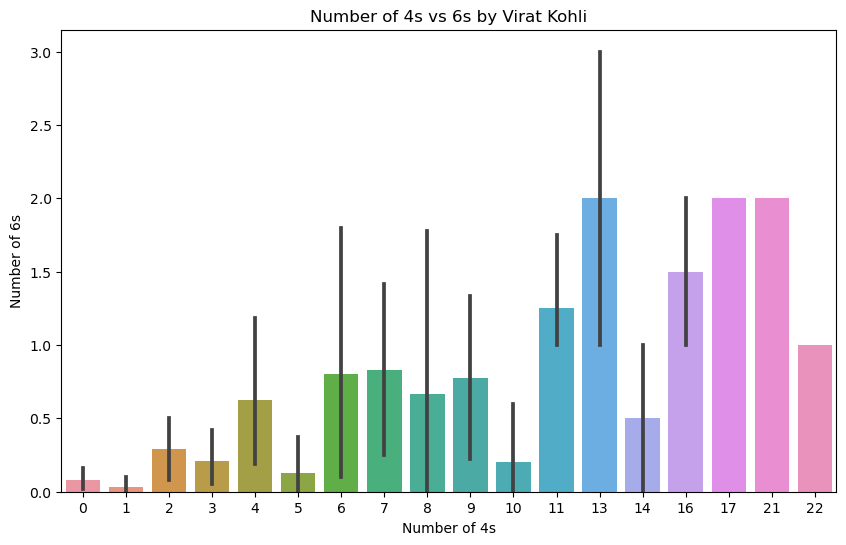

In [15]:
# Bar chart for 4s and 6s
data['4s'] = pd.to_numeric(data['4s'], errors='coerce')
data['6s'] = pd.to_numeric(data['6s'], errors='coerce')

# Remove rows with missing values (if any)
data = data.dropna(subset=['4s', '6s'])

# Bar chart for 4s and 6s
plt.figure(figsize=(10, 6))
sns.barplot(x='4s', y='6s', data=data)
plt.title('Number of 4s vs 6s by Virat Kohli')
plt.xlabel('Number of 4s')
plt.ylabel('Number of 6s')
plt.show()

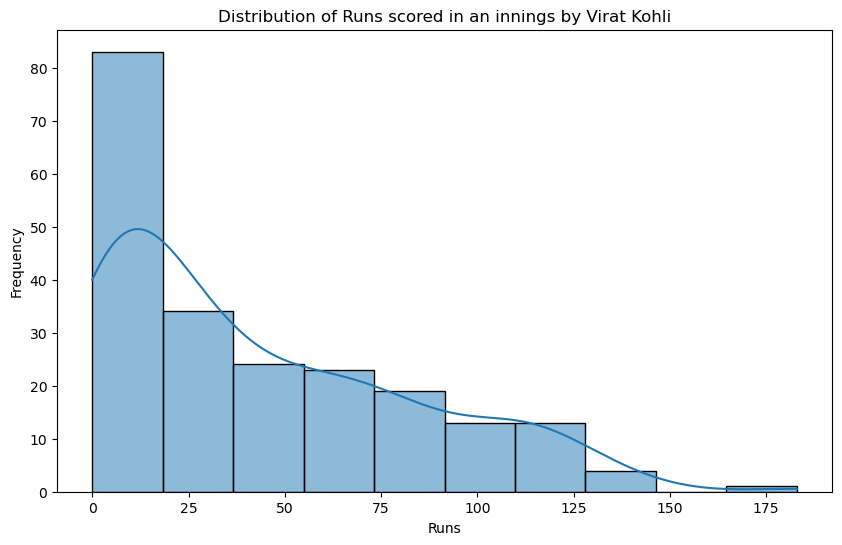

In [27]:
# Histogram for runs scored
plt.figure(figsize=(10, 6))
sns.histplot(data['Runs'], bins=10, kde=True)
plt.title('Distribution of Runs scored in an innings by Virat Kohli')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()


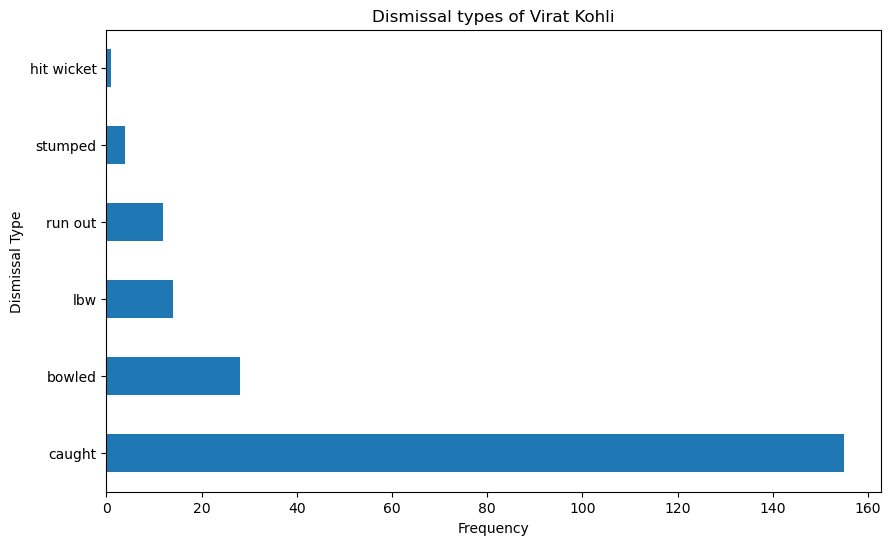

In [21]:
# Other analysis can include dismissal types, innings positions, opposition, etc.

# Dismissal Types - Horizontal Bar Chart
plt.figure(figsize=(10, 6))
dismissal_counts = data['Dismissal'].value_counts()
dismissal_counts.plot(kind='barh')
plt.title('Dismissal types of Virat Kohli')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.show()

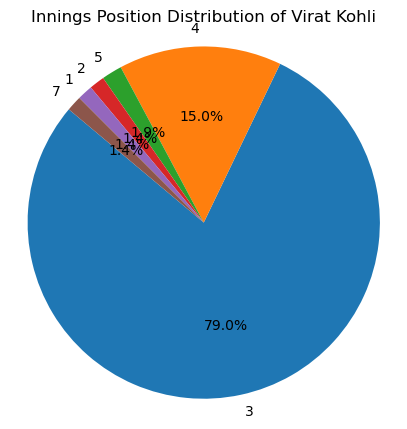

In [26]:
# Create a pie chart
# Calculate the frequency of each innings position
innings_position_counts = data['Pos'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(innings_position_counts, labels=innings_position_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Innings Position Distribution of Virat Kohli')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

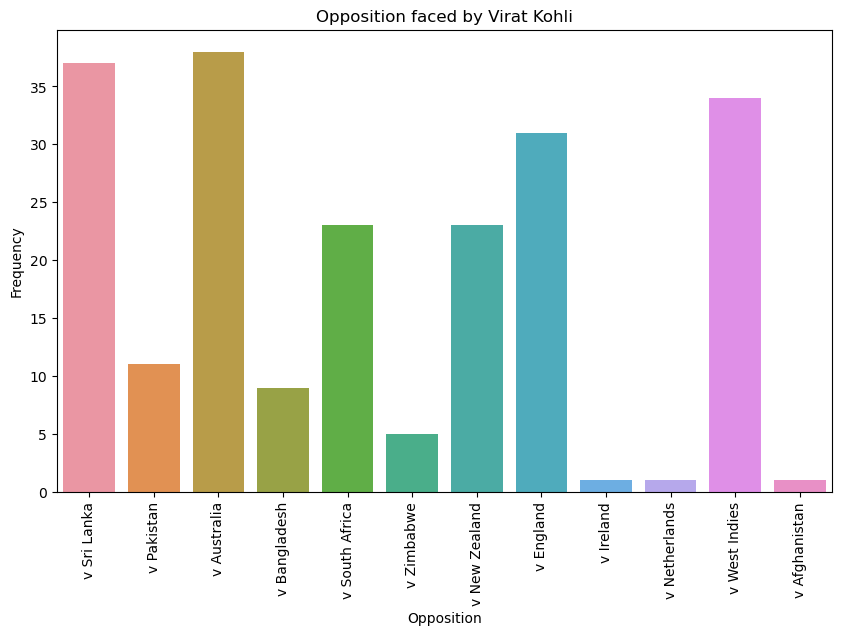

In [23]:
# Opposition analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Opposition', data=data)
plt.title('Opposition faced by Virat Kohli')
plt.xlabel('Opposition')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

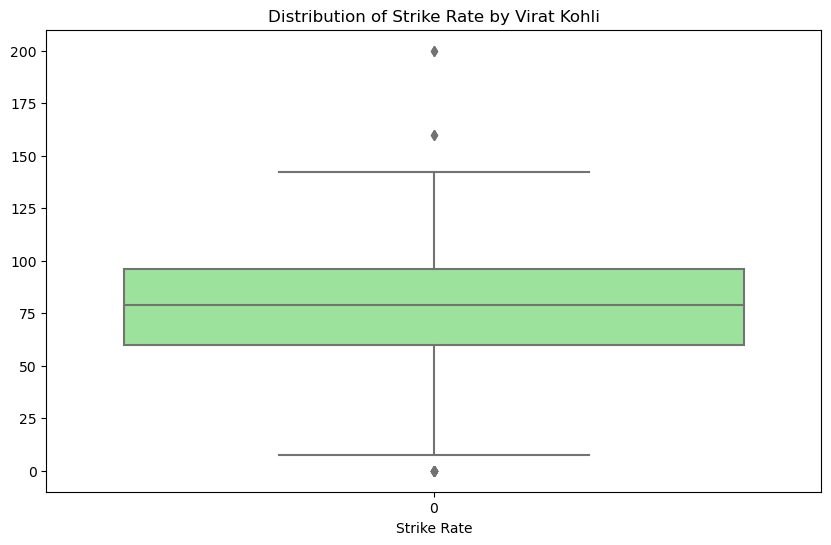

In [37]:
# Convert 'SR' column to numeric type, replacing non-numeric values with NaN
data['SR'] = pd.to_numeric(data['SR'], errors='coerce')

# Remove rows with NaN values in 'SR' column
data = data.dropna(subset=['SR'])

# Create boxplot for Strike Rate
plt.figure(figsize=(10, 6))
sns.boxplot(data['SR'], color='lightgreen')
plt.title('Distribution of Strike Rate by Virat Kohli')
plt.xlabel('Strike Rate')
plt.show()

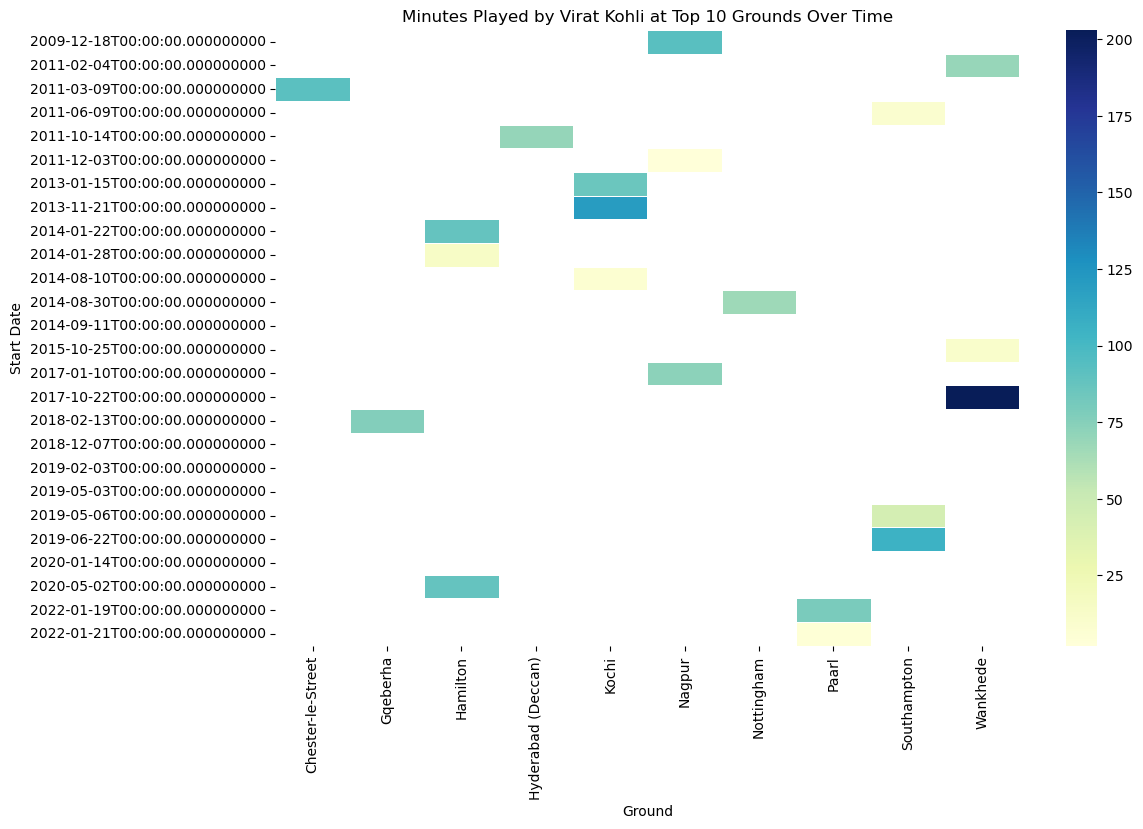

In [49]:
# Convert 'Start Date' column to datetime
data['Start Date'] = pd.to_datetime(data['Start Date'])

# Aggregate data by 'Ground' to calculate total minutes played at each ground
ground_minutes = data.groupby('Ground')['Mins'].sum().sort_values(ascending=False)

# Select top 10 grounds
top_10_grounds = ground_minutes.head(10).index

# Filter data for the top 10 grounds
filtered_data = data[data['Ground'].isin(top_10_grounds)]

# Create a pivot table with 'Start Date' as rows, 'Ground' as columns, and 'Minutes' as values
pivot_table = filtered_data.pivot_table(index='Start Date', columns='Ground', values='Mins', aggfunc='sum')

# Replace non-numeric values ('-') with NaNs
pivot_table = pivot_table.apply(pd.to_numeric, errors='coerce')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5)
plt.title('Minutes Played by Virat Kohli at Top 10 Grounds Over Time')
plt.xlabel('Ground')
plt.ylabel('Start Date')
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_14332\3837486882.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Start Date'] = pd.to_datetime(data['Start Date'])


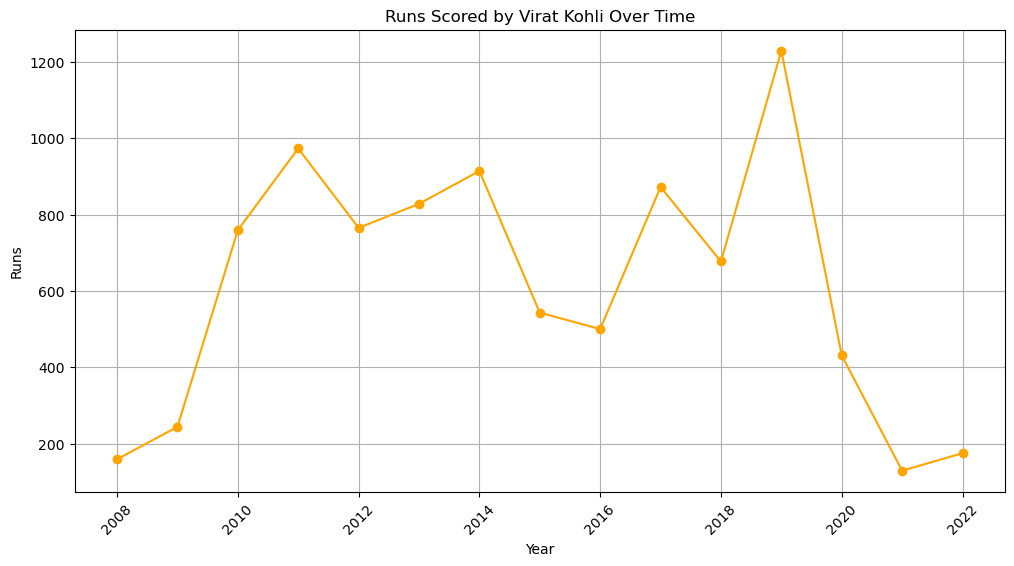

In [34]:
data['Start Date'] = pd.to_datetime(data['Start Date'])
plt.figure(figsize=(12, 6))
data.groupby(data['Start Date'].dt.year)['Runs'].sum().plot(marker='o', color='orange')
plt.title('Runs Scored by Virat Kohli Over Time')
plt.xlabel('Year')
plt.ylabel('Runs')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


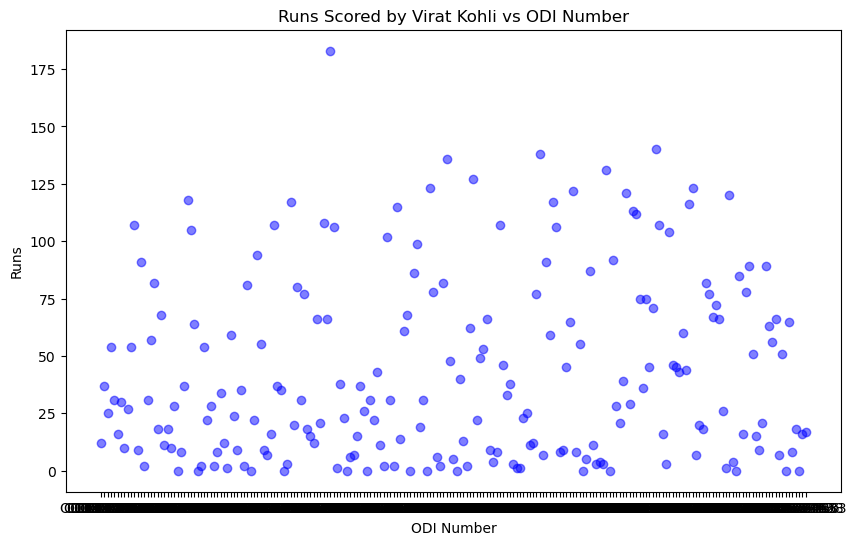

In [40]:
# Create scatter plot for ODI Number vs Runs
plt.figure(figsize=(10, 6))
plt.scatter(data['Odi No'], data['Runs'], color='blue', alpha=0.5)
plt.title('Runs Scored by Virat Kohli vs ODI Number')
plt.xlabel('ODI Number')
plt.ylabel('Runs')

plt.show()